# Red Neuronal Convolucional - Perros y Gatos

Continuamos con la implementación de la red neuronal convolucional en Python. Sabemos que una red neuronal convolucional puede aprender a identificar las características relacionadas en un mapa 2D, como las imágenes. En este notebook, resolveremos la tarea de clasificación de imágenes con una CNN.    

Dado un conjunto de imágenes, la tarea consiste en predecir si una imagen contiene un gato o un perro.   

Para ello se va a utilizar el dataset de Kaggle que se encuentra en la siguiente url: https://www.kaggle.com/competitions/dogs-vs-cats/data

## 1. Importamos las librerías necesarias

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


2025-12-16 16:06:12.002536: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-16 16:06:12.108472: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-16 16:06:14.673007: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## 2. Construcción del modelo de Red Neuronal Convolucional.   

Construcción y compilación del modelo 

In [2]:
cnn_model = Sequential()
# en esta primera capa convolucional se definen 32 filtros de 3x3 y se define el tamaño de la imagen de entrada (64x64x3) donde 3 es el número de canales (RGB)
conv_layer1 = Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)) 
cnn_model.add(conv_layer1)
pool_layer1 = MaxPooling2D(pool_size=(2, 2)) # pool_size=2, 2 hace que la imagen se reduzca a la mitad. El primer 2 es para el eje x y el segundo para el eje y
cnn_model.add(pool_layer1)
conv_layer2 = Conv2D(32, (3, 3), activation='relu') # se definen 32 filtros de 3x3 en la segunda capa convolucional para detectar patrones más complejos
cnn_model.add(conv_layer2)
pool_layer2 = MaxPooling2D(pool_size=(2, 2)) # se vuelve a reducir la imagen a la mitad
cnn_model.add(pool_layer2)
flatten_layer = Flatten() # se aplana la imagen para que pueda ser procesada por una red neuronal. Se convierte en un vector de 1 dimensión.
cnn_model.add(flatten_layer)
dense_layer1 = Dense(units=128, activation='relu') # se define una capa densa de 128 neuronas para procesar la imagen y detectar patrones más complejos
cnn_model.add(dense_layer1)
# se define una capa densa de 1 neurona para clasificar la imagen en dos categorías (gato o perro), usando la función de activación sigmoide por ser un problema de clasificación binaria
dense_layer2 = Dense(units=1, activation='sigmoid') 
cnn_model.add(dense_layer2)

# se compila el modelo con el optimizador Adam, la función de pérdida binary_crossentropy y la métrica accuracy por ser un problema de clasificación binaria.

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/home/jordi/Documentos/Ribera/Curso_25_26/CEIABD/CEIABD_25_26/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1765897580.794437  167631 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6096 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


## 3. Resumen del modelo

In [3]:
# Mostramos un resumen del modelo
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Estructura del modelo

In [ ]:
# !pip install pydot
# !pip install graphviz

  Using cached pydot-4.0.1-py3-none-any.whl.metadata (11 kB)
Using cached pydot-4.0.1-py3-none-any.whl (37 kB)


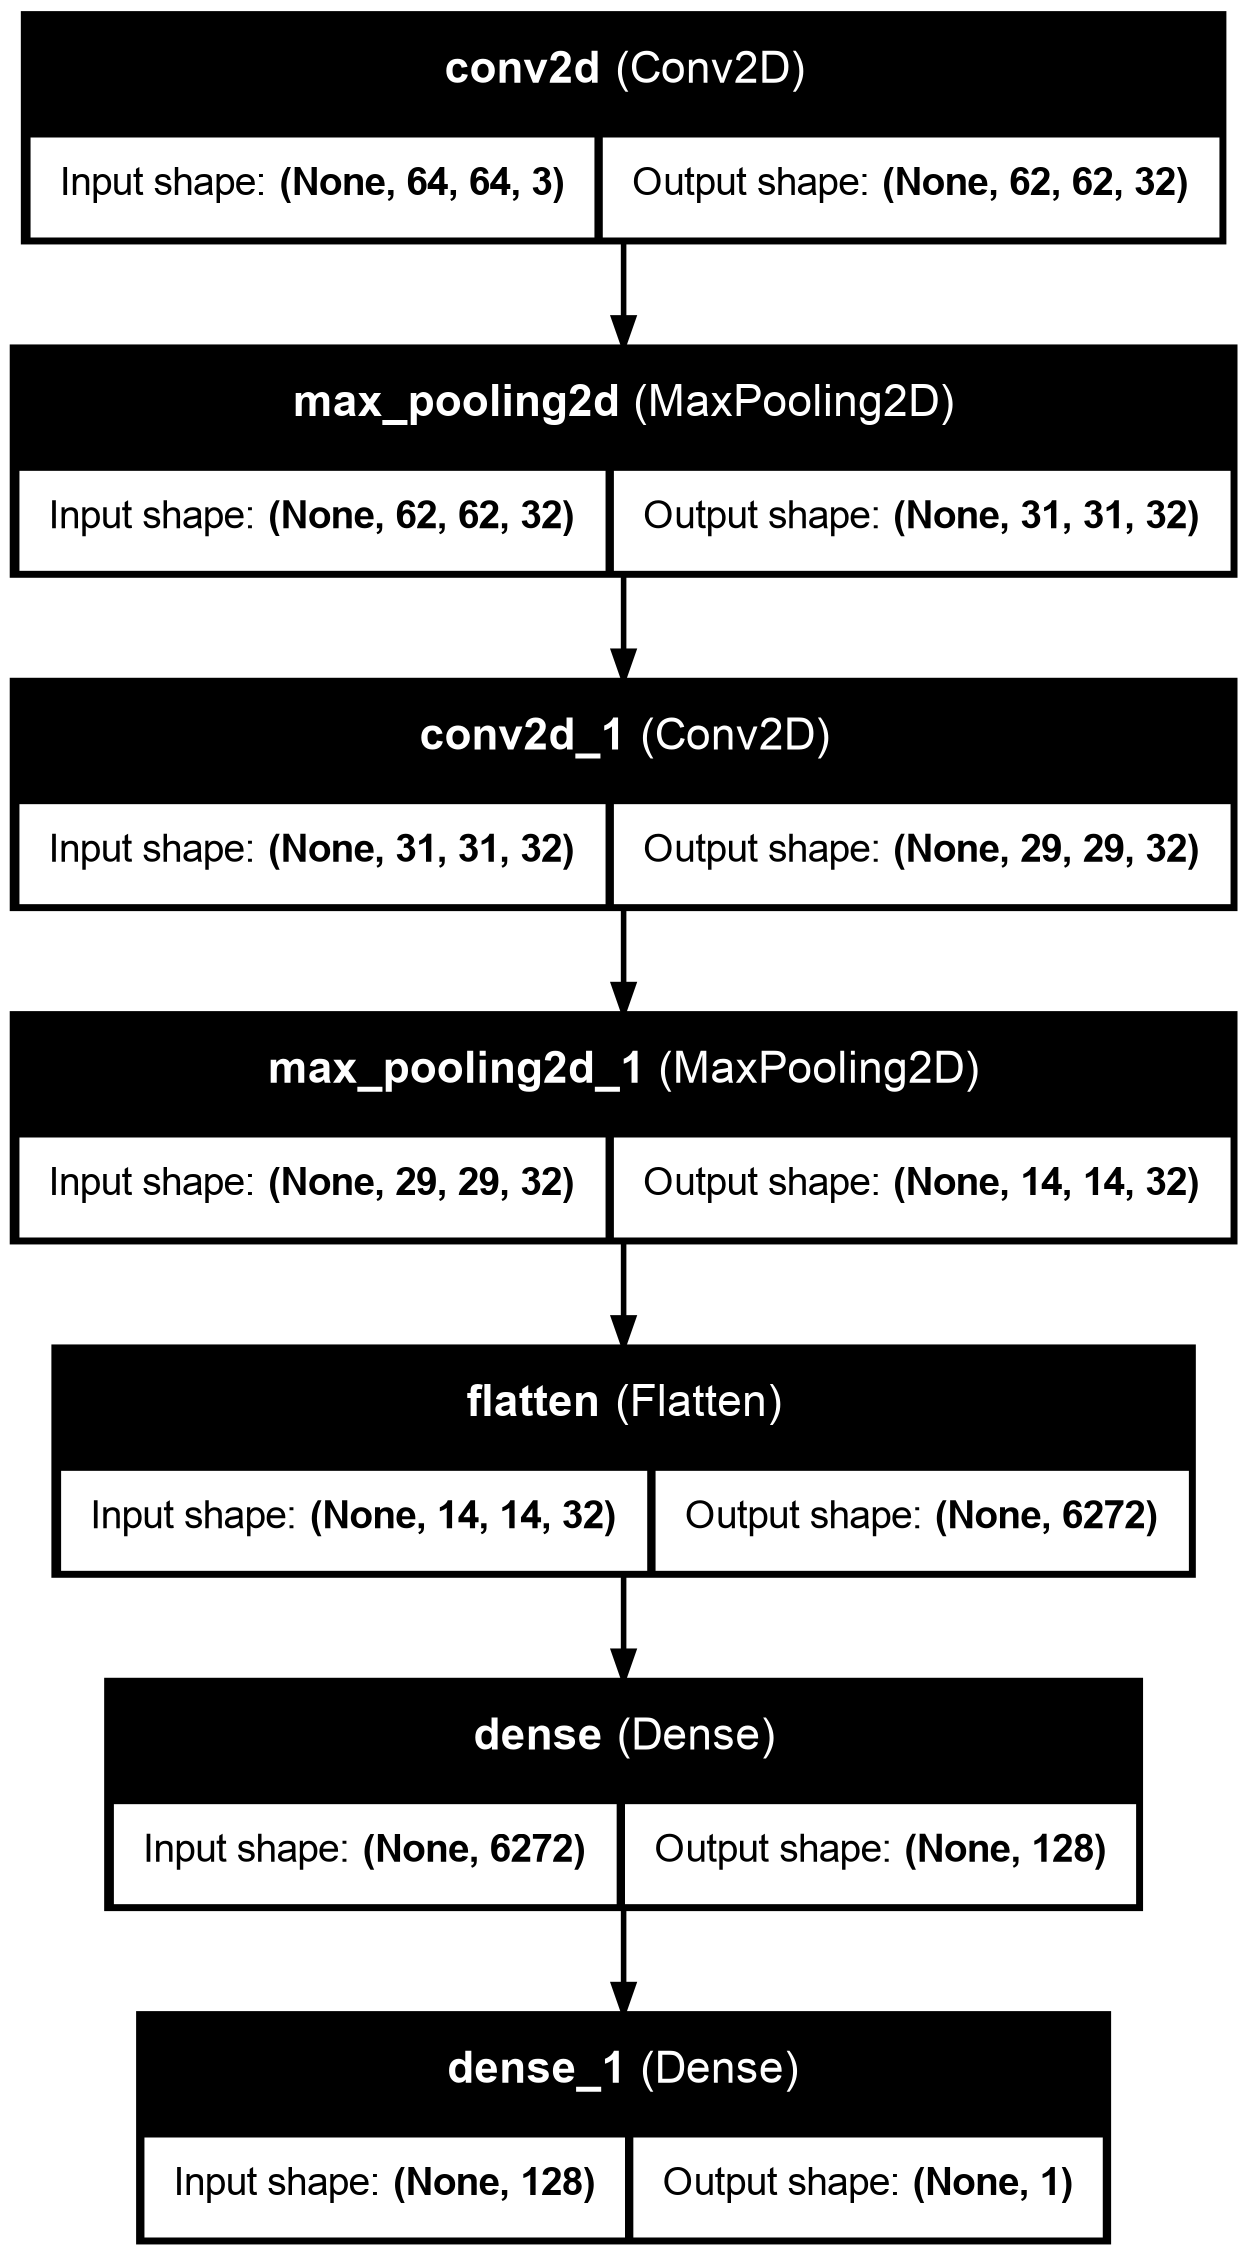

In [4]:
# Graficar el modelo
# pip install pydot
# pip install graphviz
# apt-get install graphviz
from tensorflow.keras.utils import plot_model
plot_model(cnn_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

## 5. Visualización imagen de ejemplo

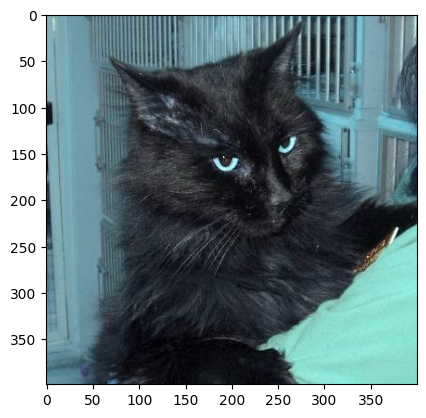

In [5]:
# Visualizar una imagen de ejemplo
import random, os
import cv2 # pip install opencv-python
import matplotlib.pyplot as plt
sample = random.choice(os.listdir('./datasets/catsvsdogs/training_set/cats'))
img = cv2.imread('./datasets/catsvsdogs/training_set/cats/' + sample)
plt.imshow(img)

## 6. Preparación del particionado del conjunto de datos de entrenamiento en train y validation

La siguiente función toma una carpeta con imagenes separadas en dos grupos (ubicados en sendas carpetas) y crea dos carpetas con conjuntos de entrenamiento y validación para poder realizar la generación de imágenes sintéticas.

In [8]:
import os
import shutil
import random

def split_dataset(source_dir, train_dir, val_dir, split_ratio=0.8):
    """
    Divide un conjunto de datos de imágenes en conjuntos de entrenamiento y validación.

    Args:
        source_dir (str): Ruta al directorio fuente.
        train_dir (str): Ruta al directorio de entrenamiento.
        val_dir (str): Ruta al directorio de validación.
        split_ratio (float): Proporción de datos para el conjunto de entrenamiento (por defecto: 0.8).
    """

    for class_name in os.listdir(source_dir):
        class_source_dir = os.path.join(source_dir, class_name)
        if os.path.isdir(class_source_dir):
            class_train_dir = os.path.join(train_dir, class_name)
            class_val_dir = os.path.join(val_dir, class_name)

            os.makedirs(class_train_dir, exist_ok=True)
            os.makedirs(class_val_dir, exist_ok=True)

            files = os.listdir(class_source_dir)
            random.shuffle(files)

            split_index = int(len(files) * split_ratio)
            train_files = files[:split_index]
            val_files = files[split_index:]

            for file_name in train_files:
                source_file = os.path.join(class_source_dir, file_name)
                train_file = os.path.join(class_train_dir, file_name)
                shutil.copy(source_file, train_file)

            for file_name in val_files:
                source_file = os.path.join(class_source_dir, file_name)
                val_file = os.path.join(class_val_dir, file_name)
                shutil.copy(source_file, val_file)

In [9]:
# Rutas de directorios
source_dir = './datasets/catsvsdogs/training_set'
train_dir = './datasets/catsvsdogs/train'
val_dir = './datasets/catsvsdogs/validation'

# Dividir el conjunto de datos
split_dataset(source_dir, train_dir, val_dir)

print(f"Conjunto de datos dividido en:\n- Entrenamiento: {train_dir}\n- Validación: {val_dir}")

Conjunto de datos dividido en:
- Entrenamiento: ./datasets/catsvsdogs/train
- Validación: ./datasets/catsvsdogs/validation


## 7. Data augmentation 

### Construcción de los generadores de datos con [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator), que permite generar lotes de imágenes aumentadas en tiempo real y aplicando transformaciones geométricas 

Creación de los generadores de imágenes sintéticas para entrenamiento y validación

In [11]:
# Generadores de datos con aumento de imágenes
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_generator = ImageDataGenerator(rescale=1./255, # normalización de píxeles
                                     shear_range=0.2,  # rango de cizallamiento (El cizallamiento es una transformación geométrica que desplaza cada punto de una imagen en una dirección paralela a un eje fijo, creando un efecto de inclinación o distorsión)
                                     zoom_range=0.2, # rango de zoom
                                     horizontal_flip=True) # volteo horizontal aleatorio

validation_generator = ImageDataGenerator(rescale=1./255)

Carga de imágenes desde los directorios de train y validation

In [13]:
# Se cargan las imágenes de los directorios de entrenamiento y validación

training_data = train_generator.flow_from_directory('./datasets/catsvsdogs/train', # flow_from_directory() carga las imágenes de un directorio y las divide en lotes
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_data = validation_generator.flow_from_directory('./datasets/catsvsdogs/validation',
                                               target_size=(64, 64),
                                               batch_size=32,
                                               class_mode='binary')

Found 24784 images belonging to 2 classes.
Found 12189 images belonging to 2 classes.


## 8. Entrenamiento del modelo CNN con los datos de entrenamiento y validación
Se usan las imágenes de validación para evaluar el rendimiento del modelo en cada época

In [14]:
# Entrenamiento del modelo
cnn_model.fit(training_data,
            steps_per_epoch=(8000//32), # 8000 imágenes de entrenamiento divididas en lotes de 32 imágenes
            epochs=25,
            validation_data=validation_data,
            validation_steps=(2000//32)) # 2000 imágenes de validación divididas en lotes de 32 imágenes

Epoch 1/25


2025-12-16 16:11:54.514399: I external/local_xla/xla/service/service.cc:163] XLA service 0x7bf23c00c290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-16 16:11:54.514437: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-12-16 16:11:54.576171: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-16 16:11:55.003163: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
2025-12-16 16:11:55.058136: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-16 16:11:57.

  3/250 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.4722 - loss: 0.7001

I0000 00:00:1765897919.673743  167781 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 120ms/step - accuracy: 0.5886 - loss: 0.6668 - val_accuracy: 0.6598 - val_loss: 0.6170
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 106ms/step - accuracy: 0.6733 - loss: 0.6037 - val_accuracy: 0.6820 - val_loss: 0.5825
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step - accuracy: 0.7090 - loss: 0.5650 - val_accuracy: 0.7399 - val_loss: 0.5289
Epoch 4/25
 25/250 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.7091 - loss: 0.5607

/home/jordi/Documentos/Ribera/Curso_25_26/CEIABD/CEIABD_25_26/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7088 - loss: 0.5619 - val_accuracy: 0.7324 - val_loss: 0.5298
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.7288 - loss: 0.5369 - val_accuracy: 0.7278 - val_loss: 0.5402
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 110ms/step - accuracy: 0.7445 - loss: 0.5181 - val_accuracy: 0.7681 - val_loss: 0.4802
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 108ms/step - accuracy: 0.7527 - loss: 0.4994 - val_accuracy: 0.7581 - val_loss: 0.5012
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7688 - loss: 0.4889 - val_accuracy: 0.7661 - val_loss: 0.4878
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - accuracy: 0.7651 - loss: 0.4845 - val_accuracy: 0.8014 - val_loss: 0.4277
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 29s 115ms/step - accuracy: 0.7698 - loss: 0.4777 - val_accuracy: 0.7944 - val_loss: 0.4437
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 114ms/step - accuracy: 0.7862 - loss: 0.4541 - val_ac

## 9. Predicción con una imagen del conjunto de test

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image
# Cargar la imagen de prueba y convertirla a un array
test_image = random.choice(os.listdir('./datasets/catsvsdogs/test_set'))
test_image = image.load_img('./datasets/catsvsdogs/test_set/' + test_image, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)



# Realizar la predicción sobre la imagen de prueba
result = cnn_model.predict(test_image)

# Imprimir el resultado de la predicción usando el diccionario de clases
training_data.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
dog


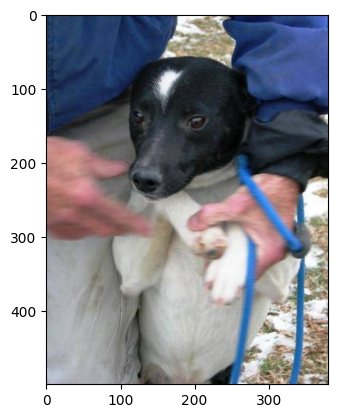

In [18]:
plt.imshow(image.load_img('./datasets/catsvsdogs/test_set/1.jpg'))